In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Face\ Mask\ Detection

/content/drive/.shortcut-targets-by-id/1e2-Ms1e9ar79MMl7gtEzQ8fXKad5yFP0/Face Mask Detection


In [ ]:
import cv2,os
data_path='/content/drive/MyDrive/Face Mask Detection/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
                         
label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'without mask': 0, 'with mask': 1}
['without mask', 'with mask']
[0, 1]


In [ ]:
img_size = 100
data=[]
target=[]

for category in categories:
  folder_path=os.path.join(data_path,category)
  img_names=os.listdir(folder_path)

  for img_name in img_names:
    img_path=os.path.join(folder_path,img_name)
    img=cv2.imread(img_path)

    try:
      gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      resized=cv2.resize(gray,(img_size,img_size))
      data.append(resized)
      target.append(label_dict[category])
    except:
      print('Exception: ',e)

In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [ ]:
import numpy as np
data=np.load('data.npy')
target=np.load('target.npy')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint


In [ ]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
!pwd

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
pwd: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [ ]:
cd /content/

/content


In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 78s 2s/step - loss: 0.7250 - accuracy: 0.5444 - val_loss: 0.7463 - val_accuracy: 0.5282
INFO:tensorflow:Assets written to: model-001.model/assets


INFO:tensorflow:Assets written to: model-001.model/assets


Epoch 2/20
31/31 [==============================] - 77s 2s/step - loss: 0.5858 - accuracy: 0.6919 - val_loss: 0.4545 - val_accuracy: 0.7903
INFO:tensorflow:Assets written to: model-002.model/assets


INFO:tensorflow:Assets written to: model-002.model/assets


Epoch 3/20
31/31 [==============================] - 77s 2s/step - loss: 0.4073 - accuracy: 0.8141 - val_loss: 0.3127 - val_accuracy: 0.8629
INFO:tensorflow:Assets written to: model-003.model/assets


INFO:tensorflow:Assets written to: model-003.model/assets


Epoch 4/20
31/31 [==============================] - 77s 2s/step - loss: 0.2707 - accuracy: 0.8929 - val_loss: 0.2651 - val_accuracy: 0.8871
INFO:tensorflow:Assets written to: model-004.model/assets


INFO:tensorflow:Assets written to: model-004.model/assets


Epoch 5/20
31/31 [==============================] - 76s 2s/step - loss: 0.2104 - accuracy: 0.9152 - val_loss: 0.2861 - val_accuracy: 0.8911
Epoch 6/20
31/31 [==============================] - 76s 2s/step - loss: 0.1679 - accuracy: 0.9394 - val_loss: 0.2743 - val_accuracy: 0.8831
Epoch 7/20
31/31 [==============================] - 77s 2s/step - loss: 0.1347 - accuracy: 0.9525 - val_loss: 0.3184 - val_accuracy: 0.8790
Epoch 8/20
31/31 [==============================] - 77s 2s/step - loss: 0.1028 - accuracy: 0.9657 - val_loss: 0.1851 - val_accuracy: 0.9274
INFO:tensorflow:Assets written to: model-008.model/assets


INFO:tensorflow:Assets written to: model-008.model/assets


Epoch 9/20
31/31 [==============================] - 76s 2s/step - loss: 0.0811 - accuracy: 0.9768 - val_loss: 0.2044 - val_accuracy: 0.9274
Epoch 10/20
31/31 [==============================] - 76s 2s/step - loss: 0.0561 - accuracy: 0.9798 - val_loss: 0.2219 - val_accuracy: 0.9234
Epoch 11/20
31/31 [==============================] - 76s 2s/step - loss: 0.0573 - accuracy: 0.9848 - val_loss: 0.2061 - val_accuracy: 0.9274
Epoch 12/20
31/31 [==============================] - 76s 2s/step - loss: 0.0492 - accuracy: 0.9808 - val_loss: 0.1572 - val_accuracy: 0.9435
INFO:tensorflow:Assets written to: model-012.model/assets


INFO:tensorflow:Assets written to: model-012.model/assets


Epoch 13/20
31/31 [==============================] - 76s 2s/step - loss: 0.0517 - accuracy: 0.9768 - val_loss: 0.1748 - val_accuracy: 0.9355
Epoch 14/20
31/31 [==============================] - 76s 2s/step - loss: 0.0423 - accuracy: 0.9838 - val_loss: 0.1714 - val_accuracy: 0.9315
Epoch 15/20
31/31 [==============================] - 76s 2s/step - loss: 0.0320 - accuracy: 0.9909 - val_loss: 0.1584 - val_accuracy: 0.9355
Epoch 16/20
31/31 [==============================] - 77s 2s/step - loss: 0.0206 - accuracy: 0.9919 - val_loss: 0.2060 - val_accuracy: 0.9355
Epoch 17/20
31/31 [==============================] - 77s 2s/step - loss: 0.0333 - accuracy: 0.9899 - val_loss: 0.1574 - val_accuracy: 0.9516
Epoch 18/20
31/31 [==============================] - 77s 2s/step - loss: 0.0401 - accuracy: 0.9818 - val_loss: 0.1510 - val_accuracy: 0.9516
INFO:tensorflow:Assets written to: model-018.model/assets


INFO:tensorflow:Assets written to: model-018.model/assets


Epoch 19/20
31/31 [==============================] - 77s 2s/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.1384 - val_accuracy: 0.9597
INFO:tensorflow:Assets written to: model-019.model/assets


INFO:tensorflow:Assets written to: model-019.model/assets


Epoch 20/20
31/31 [==============================] - 76s 2s/step - loss: 0.0221 - accuracy: 0.9939 - val_loss: 0.1221 - val_accuracy: 0.9476
INFO:tensorflow:Assets written to: model-020.model/assets


INFO:tensorflow:Assets written to: model-020.model/assets


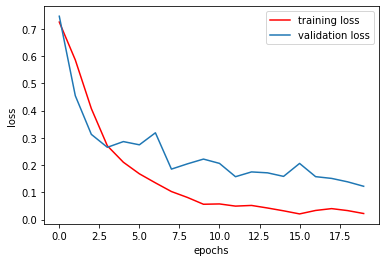

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

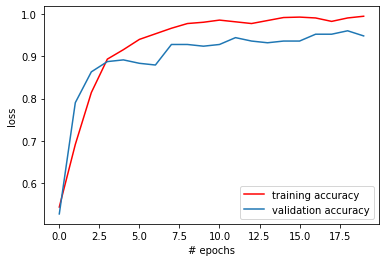

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 3s 520ms/step - loss: 0.1847 - accuracy: 0.9348
[0.18472132086753845, 0.9347826242446899]


In [ ]:
from keras.models import load_model
import cv2

In [ ]:
model = load_model('model-020.model')

face_clsfr=cv2.CascadeClassifier('/content/drive/MyDrive/Face Mask Detection/haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [ ]:
!pwd

/content


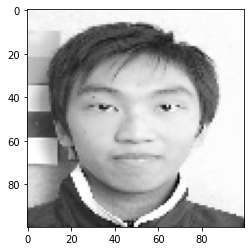

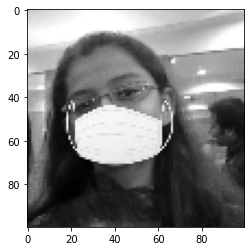

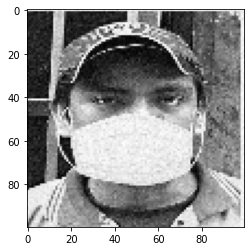

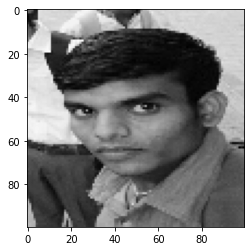

In [ ]:
for i in range(0,4):
  image=test_data[i]
  image=np.array(image, dtype= float)
  pixels=image.reshape((100,100))
  plt.imshow(pixels, cmap='gray')
  plt.show()

In [ ]:
predictions = model.predict(test_data[:4])
print(predictions)

[[1.4289899e-02 9.8571014e-01]
 [1.0000000e+00 3.6150734e-08]
 [1.0000000e+00 5.6262783e-10]
 [4.9499722e-05 9.9995053e-01]]


In [ ]:
print(np.argmax(predictions, axis =1 ))

[1 0 0 1]


In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)

  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces=face_clsfr.detectMultiScale(gray,1.3,5)

  for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


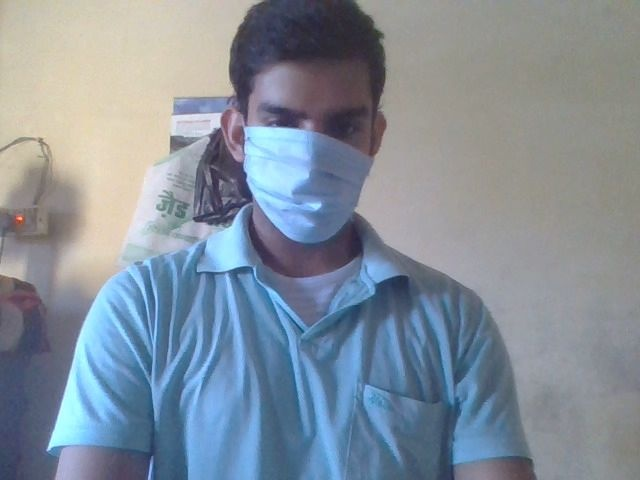

In [ ]:
from IPython.display import Image
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
  

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    gray = cv2.cvtColor(frame , cv2.COLOR_RGB2GRAY)

    faces=face_clsfr.detectMultiScale(gray,1.3,5)

    # call our darknet helper on video frame
    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(bbox_array,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(bbox_array,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(bbox_array, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored